**Lakukan Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # Pipeline khusus imblearn (bukan sklearn!)
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display
from collections import defaultdict
import joblib

**load data hasil clustering**

In [ ]:
df = pd.read_csv("hasil_clutering_iklan.csv")
print(df.head())

   Spend Amount     Ad Placement Method Type of Media (MOECM)  \
0        4000.0        Placement Vendor               Digital   
1        4956.0        Placement Vendor                 Print   
2        4956.0   Direct Through Outlet                 Print   
3        3399.0        Placement Vendor                 Print   
4        4956.0  Media Placement Vendor               Digital   

  Outlet Channel (Agency submission)               Language        Purpose  \
0                Newspaper (Digital)                English          Other   
1                  Newspaper (Print)                English  Public Health   
2                  Newspaper (Print)  Chinese (Traditional)  Public Health   
3                  Newspaper (Print)                English  Public Health   
4                  Webpage (Digital)                Spanish      Education   

           Ad Campaign Name  Cluster  
0        Setout Time Change        0  
1                     Polio        0  
2  Flu/COVID-19 Vaccina

In [ ]:
df

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Ad Campaign Name,Cluster
0,4000.00,Placement Vendor,Digital,Newspaper (Digital),English,Other,Setout Time Change,0
1,4956.00,Placement Vendor,Print,Newspaper (Print),English,Public Health,Polio,0
2,4956.00,Direct Through Outlet,Print,Newspaper (Print),Chinese (Traditional),Public Health,Flu/COVID-19 Vaccination,0
3,3399.00,Placement Vendor,Print,Newspaper (Print),English,Public Health,Back to School,0
4,4956.00,Media Placement Vendor,Digital,Webpage (Digital),Spanish,Education,Language Access,0
...,...,...,...,...,...,...,...,...
10407,272.00,Placement Vendor,Print,Newspaper (Print),English,Other,Executive Order,1
10408,314.00,Placement Vendor,Print,Newspaper (Print),English,Public Health,Bullseye Booster,1
10409,2.46,Media Placement Vendor,Other,Job Board,English,Recruitment,Recruitment,1
10410,13.50,Media Placement Vendor,Other,Job Board,English,Recruitment,Climber & Pruner – Multiple Vacancies,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10412 entries, 0 to 10411
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Spend Amount                        10412 non-null  float64
 1   Ad Placement Method                 10412 non-null  object 
 2   Type of Media (MOECM)               10412 non-null  object 
 3   Outlet Channel (Agency submission)  10412 non-null  object 
 4   Language                            10412 non-null  object 
 5   Purpose                             10412 non-null  object 
 6   Ad Campaign Name                    10411 non-null  object 
 7   Cluster                             10412 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 650.9+ KB


**medeteksi kategorikal dan menyesuikan one-hot encoding pada data categorical**

In [ ]:
categorical_list = [
    "Ad Placement Method",
    "Type of Media (MOECM)",
    "Outlet Channel (Agency submission)",
    "Language",
    "Purpose"
]

In [ ]:
for column in categorical_list:
    df[column] = df[column].str.lower()

In [ ]:
df

,Spend Amount,Ad Placement Method,Type of Media (MOECM),Outlet Channel (Agency submission),Language,Purpose,Ad Campaign Name,Cluster
0,4000.00,placement vendor,digital,newspaper (digital),english,other,Setout Time Change,0
1,4956.00,placement vendor,print,newspaper (print),english,public health,Polio,0
2,4956.00,direct through outlet,print,newspaper (print),chinese (traditional),public health,Flu/COVID-19 Vaccination,0
3,3399.00,placement vendor,print,newspaper (print),english,public health,Back to School,0
4,4956.00,media placement vendor,digital,webpage (digital),spanish,education,Language Access,0
...,...,...,...,...,...,...,...,...
10407,272.00,placement vendor,print,newspaper (print),english,other,Executive Order,1
10408,314.00,placement vendor,print,newspaper (print),english,public health,Bullseye Booster,1
10409,2.46,media placement vendor,other,job board,english,recruitment,Recruitment,1
10410,13.50,media placement vendor,other,job board,english,recruitment,Climber & Pruner – Multiple Vacancies,1


In [ ]:
df["Cluster"].unique()

array([0, 1, 2])

In [ ]:
for column in categorical_list:
    print(df[column].unique())

['placement vendor' 'direct through outlet' 'media placement vendor'
 'non-profit' 'other']
['digital' 'print' 'tv' 'other' 'radio']
['newspaper (digital)' 'newspaper (print)' 'webpage (digital)'
 'television channel' 'other' 'social media' 'radio channel'
 'radio station' 'newspaper digital' 'out of home advertisment'
 'out of home' 'streaming video' 'job board' 'magazine (digital)'
 'newsletter (digital)' 'magazine (print)' 'television show/program'
 'programmatic' 'radio show' 'radio chanel' 'website (digital)'
 'digital media' 'streaming radio' 'digital' 'radio' 'newspaper'
 'newsletter (print)' 'tv' 'television' 'journal (print)'
 'digital screens' 'digital out of home']
['english' 'chinese (traditional)' 'spanish' 'english, spanish, chinese'
 'chinese' 'korean' 'russian' 'bengali' 'chinese (cantonese)'
 'english, spanish' 'varies per location' 'unknown'
 'english, spanish, chinese, arabic, bengali, russian, urdu, korean'
 'french' 'arabic' 'urdu' 'chinese (simplified)' 'urdu, eng

In [ ]:
import pandas as pd
import numpy as np

categorical_list = [
    "Ad Placement Method",
    "Type of Media (MOECM)",
    "Outlet Channel (Agency submission)",
    "Language",
    "Purpose"
]

# Fungsi bantu untuk membersihkan dan memisahkan nilai gabungan
def split_and_clean(value):
    if pd.isna(value):
        return []
    if isinstance(value, str):
        value = value.lower()
        separators = ['|', '/', ',', '&', ';', '\\']
        for sep in separators:
            value = value.replace(sep, ',')
        return [v.strip() for v in value.split(',') if v.strip()]
    else:
        return [str(value).strip().lower()]

# Fungsi untuk membersihkan nilai cluster (dianggap integer)
def split_cluster(value):
    if pd.isna(value):
        return []
    if isinstance(value, str):
        separators = ['|', '/', ',', '&', ';', '\\']
        for sep in separators:
            value = value.replace(sep, ',')
        return [int(v.strip()) for v in value.split(',') if v.strip().isdigit()]
    elif isinstance(value, (list, np.ndarray)):
        return [int(v) for v in value]
    else:
        return [int(value)]

options_dict = {}

encoded_df = pd.DataFrame(index=df.index)

# Encode kategori
for column in categorical_list:
    all_values = df[column].apply(split_and_clean)
    unique_labels = sorted(set(label for sublist in all_values for label in sublist))
    options_dict[column] = unique_labels

    for label in unique_labels:
        encoded_df[f"{column}__{label}"] = all_values.apply(lambda x: int(label in x))

# Multi-label encoding untuk Cluster
cluster_values = df["Cluster"].apply(split_cluster)
unique_clusters = sorted(set(c for sublist in cluster_values for c in sublist))

for cluster in unique_clusters:
    encoded_df[f"Cluster__{cluster}"] = cluster_values.apply(lambda x: int(cluster in x))

# (Optional) Print info
print("Label unik dalam 'Cluster':", unique_clusters)


Label unik dalam 'Cluster': [0, 1, 2]


<ipython-input-64-7b562e54bd22>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_df[f"{column}__{label}"] = all_values.apply(lambda x: int(label in x))
<ipython-input-64-7b562e54bd22>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_df[f"{column}__{label}"] = all_values.apply(lambda x: int(label in x))
<ipython-input-64-7b562e54bd22>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

In [ ]:
encoded_df["Spend Amount"] = df["Spend Amount"].fillna(0)


<ipython-input-65-85b10e94d8fb>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_df["Spend Amount"] = df["Spend Amount"].fillna(0)


**menampilakan data hasil encoding**

In [ ]:
encoded_df

,Ad Placement Method__direct through outlet,Ad Placement Method__media placement vendor,Ad Placement Method__non-profit,Ad Placement Method__other,Ad Placement Method__placement vendor,Type of Media (MOECM)__digital,Type of Media (MOECM)__other,Type of Media (MOECM)__print,Type of Media (MOECM)__radio,Type of Media (MOECM)__tv,...,Purpose__public notice,Purpose__public safety,Purpose__quality of life,Purpose__recruitmant,Purpose__recruitment,Purpose__social services,Cluster__0,Cluster__1,Cluster__2,Spend Amount
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4000.00
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,4956.00
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,4956.00
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3399.00
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4956.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,272.00
10408,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,314.00
10409,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,2.46
10410,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,13.50


In [ ]:
encoded_df = encoded_df.sample(frac=1, random_state=42).reset_index(drop=True)

split_index = int(0.8 * len(encoded_df))

df_train = encoded_df[:split_index]
df_test = encoded_df[split_index:]


**melakukan split data untuk pelatihan model secara terpisah**

In [ ]:
encoded_df_0 = df_train.drop(columns=["Cluster__1", "Cluster__2"])
encoded_df_1 = df_train.drop(columns=["Cluster__0", "Cluster__2"])
encoded_df_2 = df_train.drop(columns=["Cluster__1", "Cluster__0"])

**model_0**

In [ ]:
X = encoded_df_0.drop(columns="Cluster__0") # Ganti dengan kolom fitur Anda
y = encoded_df_0['Cluster__0']  # Ganti dengan kolom target Anda

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
print("Distribusi kelas asli:", Counter(y))

Distribusi kelas asli: Counter({0: 5863, 1: 2466})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
base_model_0 = LogisticRegression(solver='lbfgs', max_iter=1000)
base_model_0.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = base_model_0.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model 0: {accuracy}")

Akurasi Model 0: 1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)


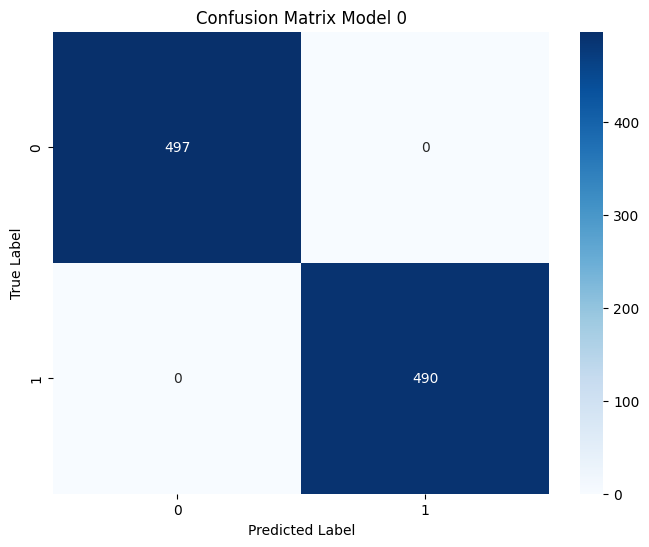

In [ ]:
plt.figure(figsize=(8, 6))  # Atur ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['0', '1'], yticklabels=['0', '1'])  # Ganti label jika perlu
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Model 0')
plt.show()

**model 1**

In [ ]:
X = encoded_df_1.drop(columns="Cluster__1") # Ganti dengan kolom fitur Anda
y = encoded_df_1['Cluster__1']  # Ganti dengan kolom target Anda

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
print("Distribusi kelas asli:", Counter(y))

Distribusi kelas asli: Counter({0: 4906, 1: 3423})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
base_model_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
base_model_1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = base_model_1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model 1: {accuracy}")

Akurasi Model 1: 0.9992700729927008


In [ ]:
cm = confusion_matrix(y_test, y_pred)


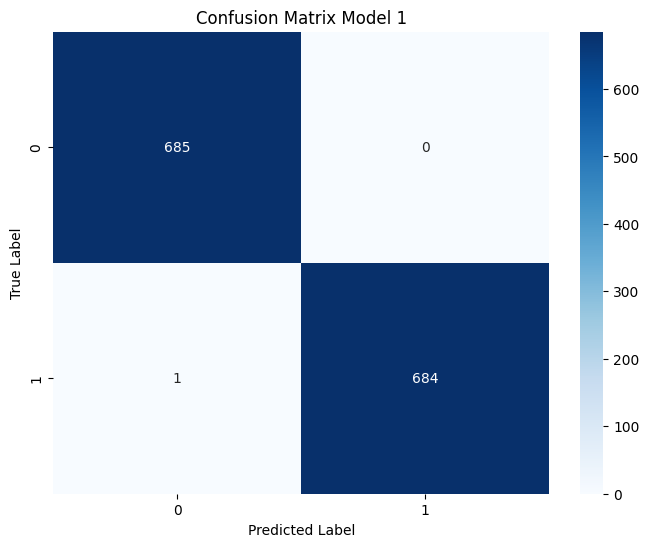

In [ ]:
plt.figure(figsize=(8, 6))  # Atur ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['0', '1'], yticklabels=['0', '1'])  # Ganti label jika perlu
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Model 1')
plt.show()

**model 2**

In [ ]:
X = encoded_df_2.drop(columns="Cluster__2") # Ganti dengan kolom fitur Anda
y = encoded_df_2['Cluster__2']  # Ganti dengan kolom target Anda

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
print("Distribusi kelas asli:", Counter(y_resampled))

Distribusi kelas asli: Counter({0: 2440, 1: 2440})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
base_model_2 = LogisticRegression(solver='lbfgs', max_iter=1000)
base_model_2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = base_model_2.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model 2: {accuracy}")

Akurasi Model 2: 0.8258196721311475


In [ ]:
cm = confusion_matrix(y_test, y_pred)

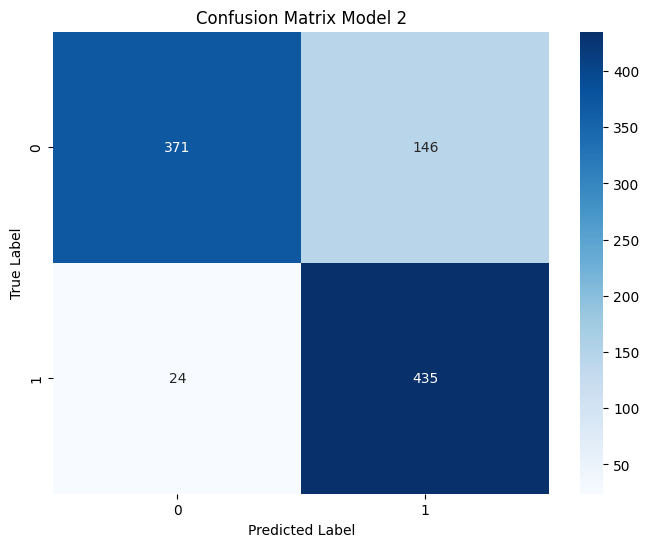

In [ ]:
plt.figure(figsize=(8, 6))  # Atur ukuran gambar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['0', '1'], yticklabels=['0', '1'])  # Ganti label jika perlu
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Model 2')
plt.show()

**mengabungkan model**

In [ ]:
df_test

,Ad Placement Method__direct through outlet,Ad Placement Method__media placement vendor,Ad Placement Method__non-profit,Ad Placement Method__other,Ad Placement Method__placement vendor,Type of Media (MOECM)__digital,Type of Media (MOECM)__other,Type of Media (MOECM)__print,Type of Media (MOECM)__radio,Type of Media (MOECM)__tv,...,Purpose__public notice,Purpose__public safety,Purpose__quality of life,Purpose__recruitmant,Purpose__recruitment,Purpose__social services,Cluster__0,Cluster__1,Cluster__2,Spend Amount
8329,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,3995.00
8330,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1750.69
8331,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2400.38
8332,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,2.46
8333,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3930.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1989.00
10408,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1696.00
10409,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1374.00
10410,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4956.00


**melakukan uji pada gabungan model**

In [ ]:
y_true = df_test[['Cluster__0', 'Cluster__1', 'Cluster__2']].values

In [ ]:
y_pred_0 = base_model_0.predict(df_test.drop(columns=['Cluster__0', 'Cluster__1', 'Cluster__2']))
y_pred_1 = base_model_1.predict(df_test.drop(columns=['Cluster__0', 'Cluster__1', 'Cluster__2']))
y_pred_2 = base_model_2.predict(df_test.drop(columns=['Cluster__0', 'Cluster__1', 'Cluster__2']))

y_pred = np.column_stack((y_pred_0, y_pred_1, y_pred_2))

y_pred = [[int(val) for val in row] for row in y_pred]


In [ ]:
print(y_pred)

[[1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1], [1, 0, 0], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 1], [0, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0]

In [ ]:
import numpy as np

# Asumsi y_true dan y_pred adalah array numpy dengan bentuk (n_samples, 3)
y_true_real = np.argmax(y_true, axis=1)
y_pred_real = np.argmax(y_pred, axis=1)

In [ ]:
print(y_true_real)

[0 2 2 ... 2 0 1]


In [ ]:
accuracy = accuracy_score(y_true_real, y_pred_real)
precision = precision_score(y_true, y_pred, average='weighted') # atau 'micro', 'macro'
recall = recall_score(y_true, y_pred, average='weighted') # atau 'micro', 'macro'
f1 = f1_score(y_true, y_pred, average='weighted') # atau 'micro', 'macro'

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9803168506961114
Precision: 0.8735623231617382
Recall: 0.9817570811329813
F1-score: 0.9151450734589324


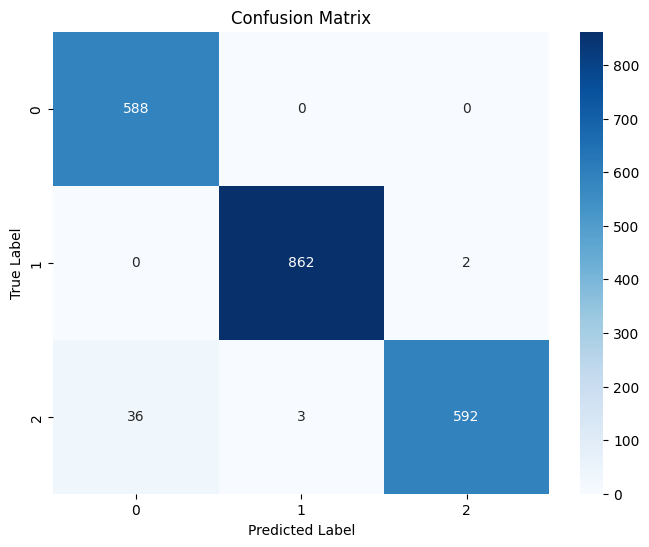

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true_real, y_pred_real)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**save model input**

In [ ]:
joblib.dump(base_model_0, 'base_model_0.pkl')


joblib.dump(base_model_1, 'base_model_1.pkl')


joblib.dump(base_model_2, 'base_model_2.pkl')

['base_model_2.pkl']

**mencoba melakukan uji coba bisa juga di lihat di app.py**

In [ ]:
# all_columns = encoded_df.drop(columns=['Cluster__0', 'Cluster__1', 'Cluster__2']).columns.tolist()
# print(all_columns)

In [ ]:
# grouped_features = defaultdict(list)
# for f in all_columns:
#     if '__' in f:
#         key, val = f.split('__', 1)
#         grouped_features[key.strip()].append(val.strip())

# # Menampilkan hasil
# for k, v in grouped_features.items():
#     print(f"{k} ({len(v)} items):")
#     print(v)
#     print()

In [ ]:
# opsi_apm =  grouped_features["Ad Placement Method"]
# opsi_type_of_media = grouped_features["Type of Media (MOECM)"]
# opsi_outlet_channel = grouped_features["Outlet Channel (Agency submission)"]
# opsi_language = grouped_features["Language"]
# opsi_purpose = grouped_features["Purpose"]

# for i in range(len(opsi_apm)):
#      print(f"{i+1}. {opsi_apm[i]}")
# Ad_Placement_Method = input("Ad Placement Method: ")
# a = f"Ad Placement Method__{Ad_Placement_Method.lower()}"
# for i in range(len(opsi_type_of_media)):
#      print(f"{i+1}. {opsi_type_of_media[i]}")
# Type_of_Media = input("Type of Media (MOECM): ")
# b = f"Type of Media (MOECM)__{Type_of_Media.lower()}"
# for i in range(len(opsi_outlet_channel)):
#      print(f"{i+1}. {opsi_outlet_channel[i]}")
# Outlet_Channel = input("Outlet Channel (Agency submission): ")
# c = f"Outlet Channel (Agency submission)__{Outlet_Channel.lower()}"
# for i in range(len(opsi_language)):
#      print(f"{i+1}. {opsi_language[i]}")
# Language = input("Language: ")
# d = f"Language__{Language.lower()}"
# for i in range(len(opsi_purpose)):
#      print(f"{i+1}. {opsi_purpose[i]}")
# Purpose = input("Purpose: ")
# e = f"Purpose__{Purpose.lower()}"
# Spend_Amount = input("Spend Amount: ")


In [ ]:
# selected_features = {a, b, c, d, e}
# feature = [1 if i in selected_features else 0 for i in all_columns]

In [ ]:
# print(Spend_Amount)

In [ ]:
# feature[-1] = (float(Spend_Amount))

In [ ]:
# feature_list = []
# feature_list.append(feature)

In [ ]:
# print(feature_list)

In [ ]:
# len(all_columns)

In [ ]:
# len(feature_list[0])

In [ ]:
# X_input = np.array(feature_list)

In [ ]:
# print(X_input)

In [ ]:
# y_pred_0 = base_model_0.predict(X_input)
# y_pred_1 = base_model_1.predict(X_input)
# y_pred_2 = base_model_2.predict(X_input)

# # Gabungkan hasil prediksi menjadi multi-label
# y_pred = np.column_stack((y_pred_0, y_pred_1, y_pred_2))

# # Konversi ke list of lists of int
# y_pred = [[int(val) for val in row] for row in y_pred]


In [ ]:
# y_pred_ku = np.argmax(y_pred, axis=1)

In [ ]:
# print(y_pred_ku)